In [95]:
#load all the libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
pwd

'C:\\Users\\rajku'

In [4]:
data=pd.read_csv('diabetes1.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Domain analysis

In [6]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
data.dtypes # encoding converting catogorical data into numerical data... # outcome is unque value here

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
data.shape

(768, 9)

In [10]:
data['Outcome'].unique() # since the target value is descrete , analyse the same

array([1, 0], dtype=int64)

In [11]:
data['Outcome'].value_counts() # not balanced data , we need to balance -- outcome should be same

Outcome
0    500
1    268
Name: count, dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
# there are corrupted value a person with 0 bp,skinthickness cannot be alive..
# dropping is last option therfore we can replace it with mean or median, we can go with median as middle value of all data is good.

# if data is continous draw histogram and if data is discrete then count plot

<Axes: xlabel='Pregnancies', ylabel='count'>

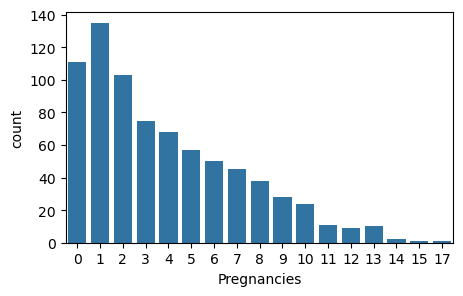

In [16]:
# target column --> count plot 
plt.figure(figsize=(5,3))
sns.countplot(x=data['Pregnancies'])

<Axes: xlabel='Outcome', ylabel='count'>

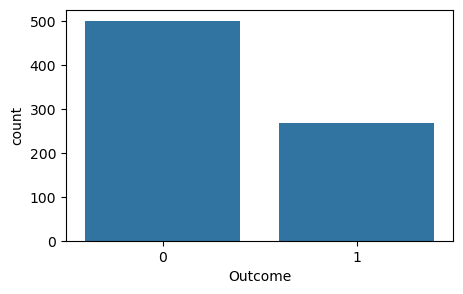

In [17]:
plt.figure(figsize=(5,3))
sns.countplot(x=data['Outcome'])

In [18]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [19]:
data.loc[data['Glucose']==0,'Glucose'] = data['Glucose'].median()# replacing glucose with median

In [20]:
data.describe() # boxplot

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.438286,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


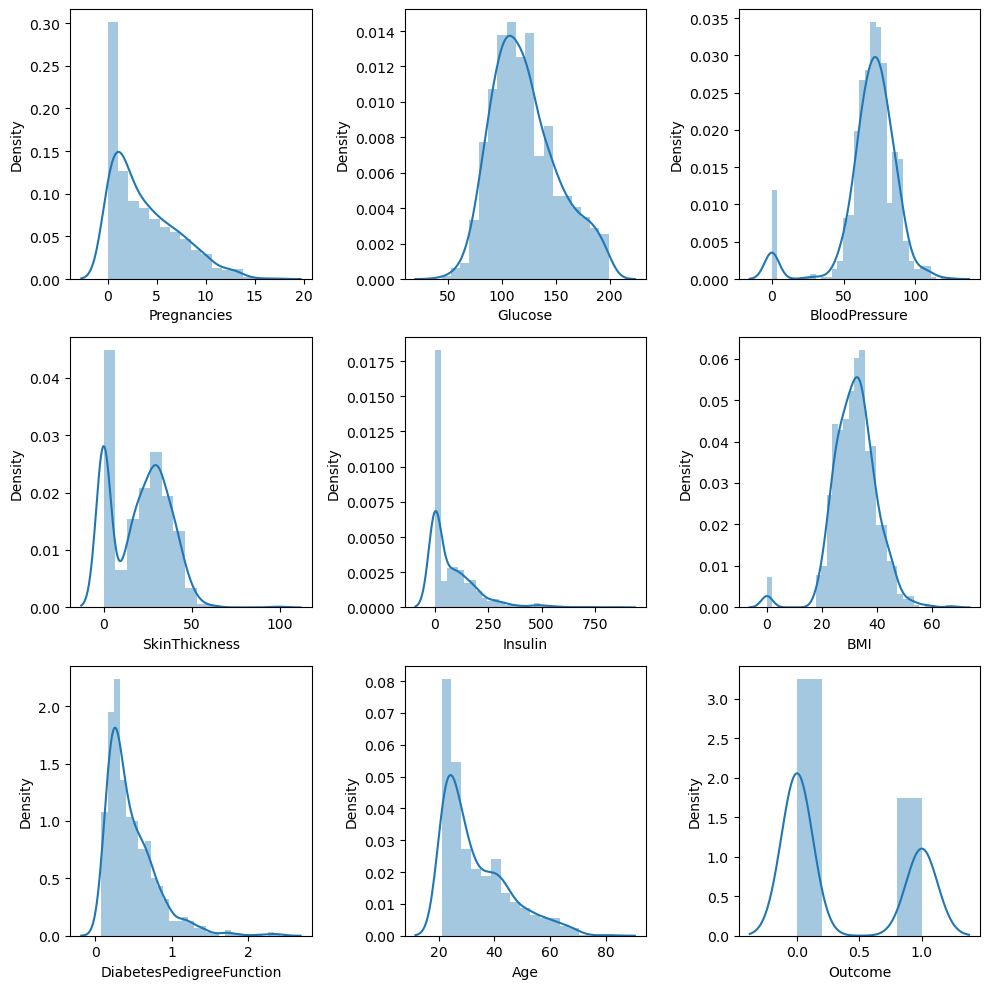

In [21]:
plt.figure(figsize=(10,10))
plotnumber = 1

for i in data:
    if plotnumber <= 9:
        
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x=data[i])
        plt.xlabel(i,fontsize=10)
    plotnumber +=1
plt.tight_layout()
# since it is squeued high chance of outlier


## bivariate analysis

In [23]:
# analyze all input variables with target
# preg and outcome -->  discrete and discrete --> countplot

<Axes: xlabel='Pregnancies', ylabel='count'>

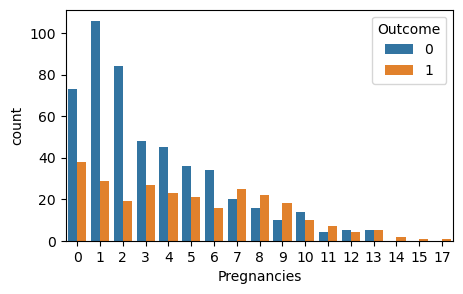

In [24]:
plt.figure(figsize=(5,3))
sns.countplot(x=data['Pregnancies'],hue=data['Outcome'])

<Axes: xlabel='Glucose', ylabel='Count'>

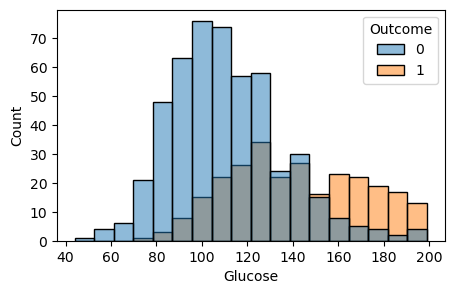

In [25]:
plt.figure(figsize=(5,3))
sns.histplot(x=data['Glucose'],hue=data['Outcome'])

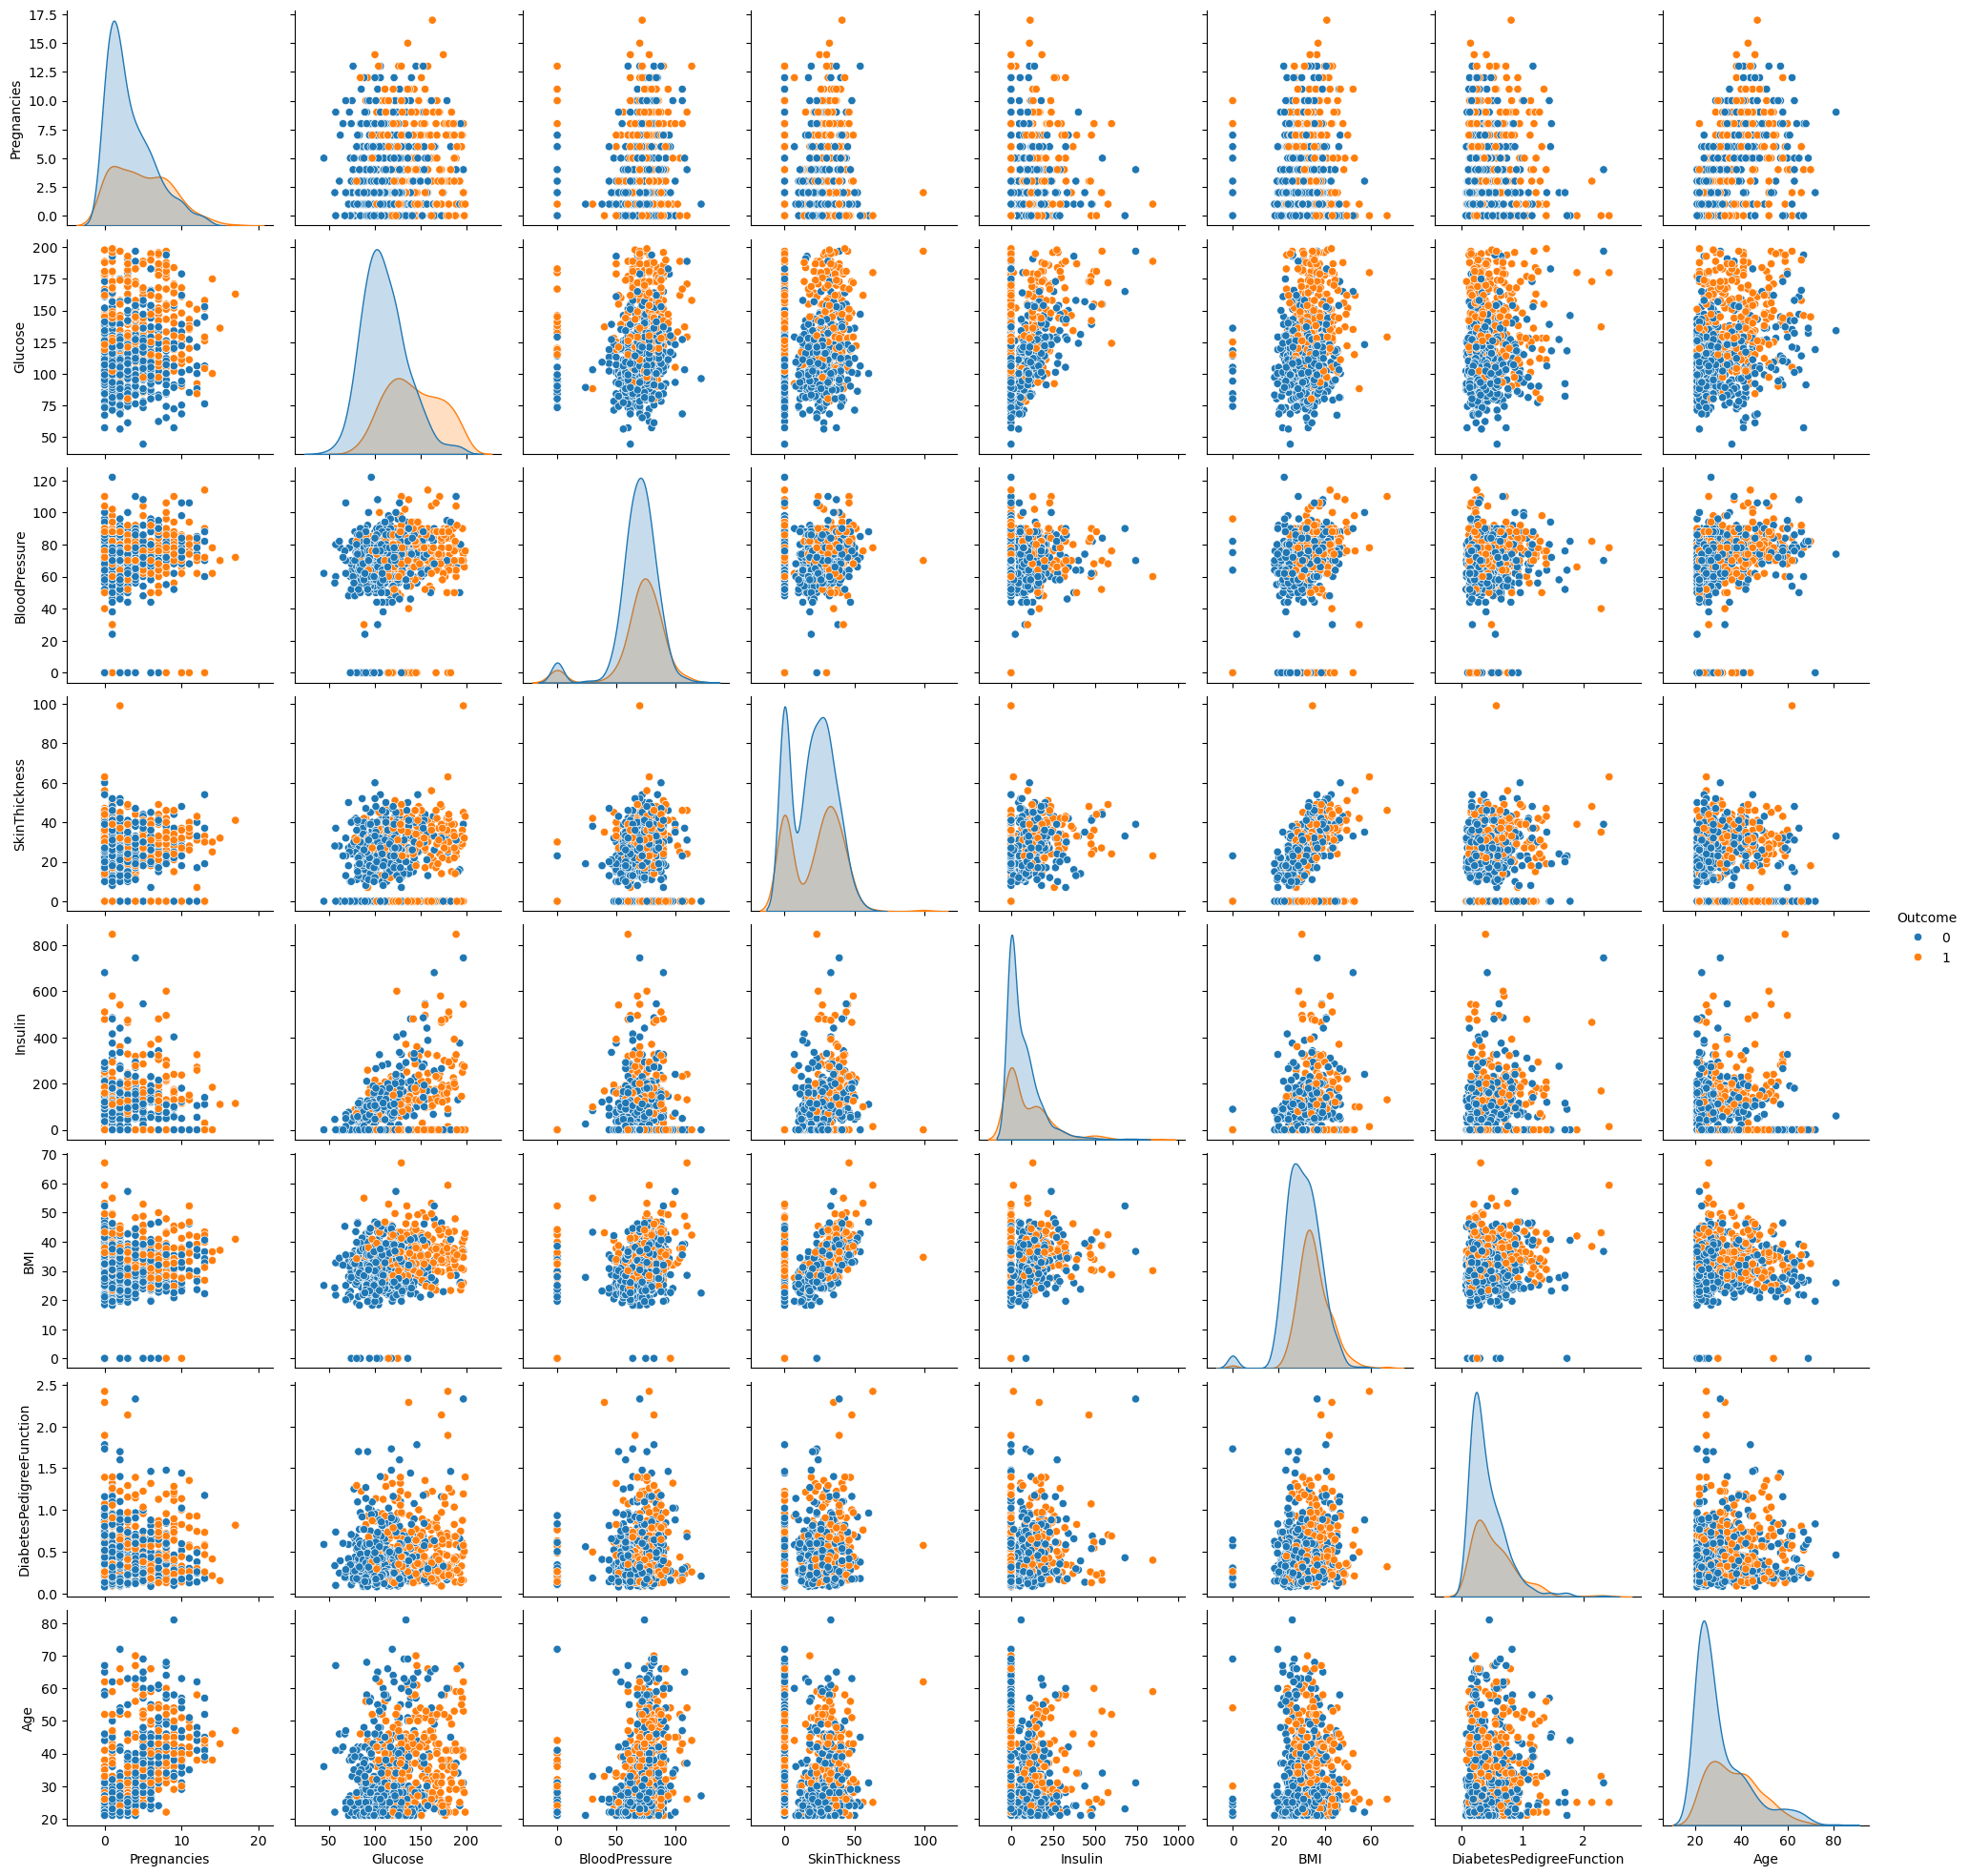

In [26]:
sns.pairplot(data,hue='Outcome')
#sns.paiplot(data , hue='Outcome')

# preprocessing

In [28]:
# null values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [29]:
data.duplicated().sum()

0

In [30]:
# first we will handle corrupted values replace with median


In [31]:
data.loc[data['Glucose']==0,'Glucose'] = data['Glucose'].median()

In [32]:
# outlier detection and handeling outlier is very imp for logistic model

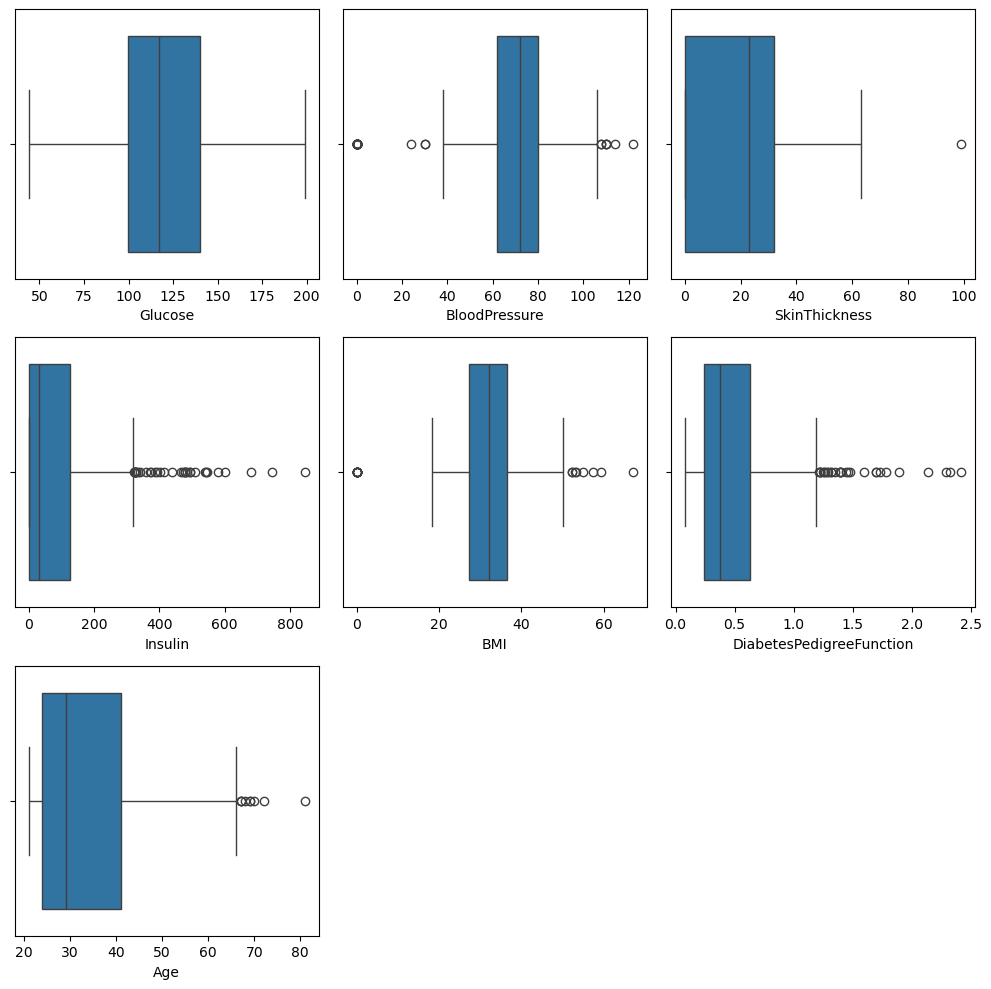

In [33]:
plt.figure(figsize=(10,10))
plotnumber = 1

for i in data.drop(columns=['Pregnancies','Outcome'],axis=1):
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(x=data[i])
        plt.xlabel(i,fontsize=10)
    plotnumber +=1
plt.tight_layout()
    

In [34]:
# except glucose we have to find skewness for all the column

In [35]:
# we can leave age also , depends on u

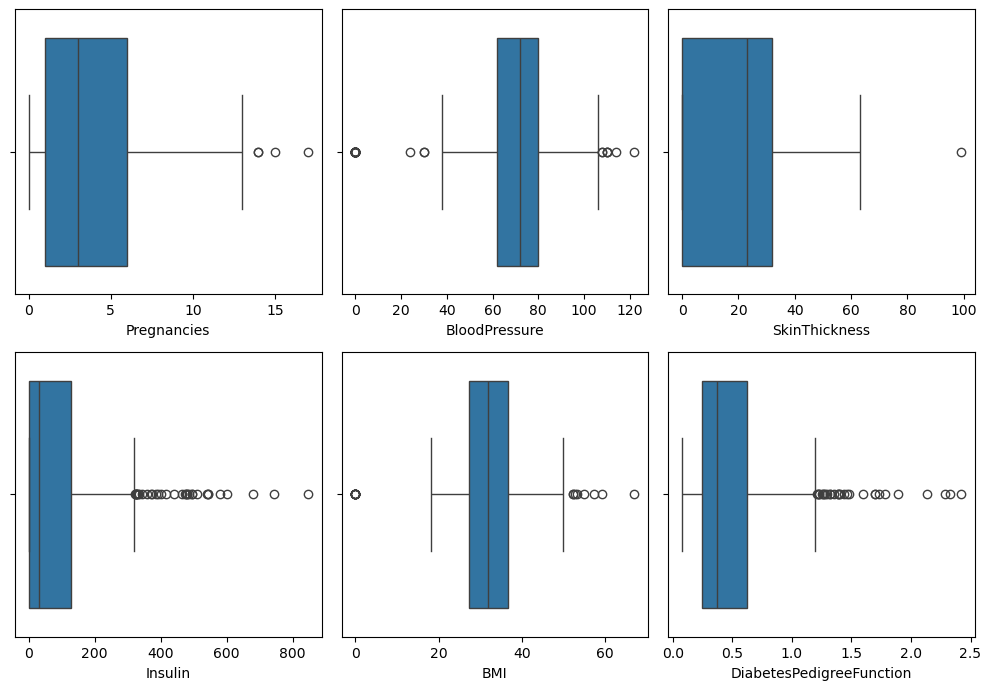

In [36]:
plt.figure(figsize=(10,10))
plotnumber = 1

for i in data.drop(columns=['Glucose','Outcome', 'Age'],axis=1):
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(x=data[i])
        plt.xlabel(i,fontsize=10)
    plotnumber +=1
plt.tight_layout()
    

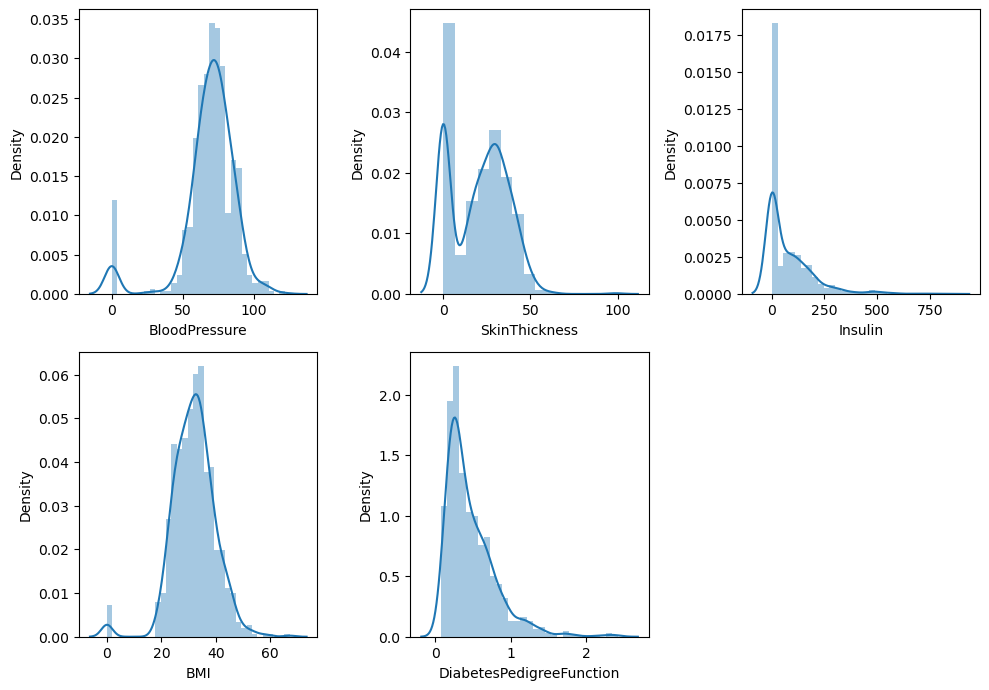

In [37]:
plt.figure(figsize=(10,10))
plotnumber = 1

for i in data.drop(columns=['Glucose','Outcome','Age','Pregnancies'],axis=1):
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x=data[i])
        plt.xlabel(i,fontsize=10)
    plotnumber +=1
plt.tight_layout()

In [38]:
# all the 6 column are skewed - IQR
# NORMSAL dis -- 3 sigma
q1 = data['BloodPressure'].quantile(0.25)
q3 = data['BloodPressure'].quantile(0.75)

In [39]:
iqr = q3-q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
data.loc[data['BloodPressure']<lower,'BloodPressure'] = data['BloodPressure'].median()
data.loc[data['BloodPressure']>upper,'BloodPressure'] = data['BloodPressure'].median()



In [40]:
# if outliers is less than 8% then handle it

# Model Building

In [42]:
x = data.drop('Outcome',axis=1)
y = data[['Outcome']]

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(x,y,test_size=0.30,random_state=2)

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = pd.DataFrame(sc.fit_transform(x_train),columns=x_train.columns)
x_test = pd.DataFrame(sc.transform(x_test),columns=x_test.columns)


In [45]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.582255,-1.142009,0.152163,-0.086067,-0.269469,-0.367343,-0.735686,-0.968578
1,-0.582255,0.210962,1.059064,-1.280825,-0.709554,-0.494955,-0.579693,-0.541825
2,-1.170535,-0.680019,0.514924,1.234454,0.037760,0.334525,-0.710160,-0.797877
3,-1.170535,0.012966,-0.029217,-1.280825,-0.709554,0.564227,-0.653435,1.591940
4,-0.876395,0.705951,0.877684,1.611745,0.785074,1.814828,-0.435046,1.079836
...,...,...,...,...,...,...,...,...
226,-0.876395,-1.175008,0.514924,0.416988,-0.443842,0.347286,-1.098722,-0.968578
227,1.182585,-0.581021,2.510104,0.982926,-0.709554,1.457513,-0.707323,0.994486
228,-1.170535,1.299939,0.333543,2.240565,0.120795,2.720875,0.767513,-0.712527
229,1.770865,-0.251028,-0.029217,-1.280825,-0.709554,0.436615,-1.005127,-0.371124


In [46]:
y_test


,Outcome
158,0
251,0
631,0
757,1
689,1
...,...
225,0
387,1
120,1
7,0


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Train the model
model = LogisticRegression()
model.fit(x_train, y_train)

# 2. Predict on test data
y_pred = model.predict(x_test)

# 3. Check accuracy
accuracy = accuracy_score(y_test, y_pred) # y_test: true labels (actual outcomes).

# y_pred: predicted labels (model’s guesses).
print("Accuracy:", accuracy)


Accuracy: 0.7402597402597403


In [97]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)

In [101]:
y_pred = (y_pred >= 0.5).astype(int)
acc = accuracy_score(y_test, y_pred)

In [103]:
print("Coefficient (slope):", model.coef_[0])
print("Intercept:", model.intercept_)
print("MSE:", mse)
print("R² Score:", r2)
print("Accuracy:", acc)

Coefficient (slope): [ 0.69392611  1.16794635 -0.07073903 -0.01803369 -0.20312352  0.62129218
  0.38031188 -0.07405717]
Intercept: [-0.81477653]
MSE: 0.2597402597402597
R² Score: -0.17657045840407504
Accuracy: 0.7402597402597403


In [111]:
example = np.array([[6, 148, 72, 35, 125, 33.6, 0.627, 50]])  # NumPy array that represents one patient’s data.
predicted_outcome = model.predict(example) 

In [113]:
print(predicted_outcome[0])

1


In [115]:
import pickle

# Save the multiple linear regression model as pickle
with open("diabetes_linear_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved as diabetes_linear_model.pkl")

Model saved as diabetes_linear_model.pkl
